# Example of loading SNCC data

In [2]:
from astropy.io import ascii
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import re
import numpy as np

In [ ]:
def getData(folder, filename): #I'm finally using python properly
    rdr = ascii.get_reader(Reader=ascii.Basic)
    rdr.header.splitter.delimiter = ' '
    rdr.data.splitter.delimiter = ' '
    if folder == 'DES_BLINDnoHOSTZ':
        rdr.header.start_line = 12
        rdr.data.start_line = 13
    else:
        rdr.header.start_line = 14
        rdr.data.start_line = 15
    rdr.data.end_line = None
    t = rdr.read('%s/%s' % (folder, filename))
    FLT = t['FLT']
    gFlux = np.array(t['FLUXCAL'][FLT == 'g'])
    rFlux = np.array(t['FLUXCAL'][FLT == 'r'])
    iFlux = np.array(t['FLUXCAL'][FLT == 'i'])
    zFlux = np.array(t['FLUXCAL'][FLT == 'z'])
    gErr = np.array(t['FLUXCALERR'][FLT == 'g'])
    rErr = np.array(t['FLUXCALERR'][FLT == 'r'])
    iErr = np.array(t['FLUXCALERR'][FLT == 'i'])
    zErr = np.array(t['FLUXCALERR'][FLT == 'z'])
    maxL = max(len(gFlux),len(rFlux), len(iFlux), len(zFlux))
    #AMJD = 
    #Result = np.array([maxL, AMJD, gFlux,rFlux,iFlux,zFlux, gErr,rErr,iErr,zErr])
    Result = np.array([gFlux,rFlux,iFlux,zFlux, gErr,rErr,iErr,zErr])
    return Result
    
def getInfo(info, file):
    for line in file:
        if line.startswith('%s' % info):
            return line[(len(info)+2)::] #might have extra spaces in front and it's a string
    return None

folder= 'DES_BLINDnoHOSTZ'

#folder: no vs +
#infoL: info list. eg. 'SNID', 'SNTYPE', 'FILTERS', 'RA', 'DECL', 'FAKE', 'MWEBV', ETC.
#totalNum: total number of supernovae in the foler. Might be improved to automatically going through all files in a folder
if folder == 'DES_BLINDnoHOSTZ':
    colName = 'DES_SN000018.DAT'
    totalNum = 18347
    infoL = ['SURVEY','SNID', 'SNTYPE', 'FILTERS', 'RA', 'DECL', 'FAKE', 'MWEBV', 'REDSHIFT_SPE','NOBS', 'NVAR']
else:
    colName = 'DES_SN000041.DAT'
    totalNum = 18320
    infoL = ['SURVEY','SNID','SNTYPE','FILTERS','RA','DECL','FAKE','MWEBV','REDSHIFT_SPE','HOST_GALAXY_GALID','HOST_GALAXY_PHOTO-Z','NOBS','NVAR']

list = ascii.read('%s/%s.LIST' % (folder, folder), data_start = 0)
table = dict()
for i in infoL:
    table[i] = []
table['FILENAME'] = []
table['DATA'] = []
#table
for i in range(totalNum):
    with open(folder + '/' + list[colName][i]) as f:
        table['FILENAME'] += [list[colName][i]]
        table['DATA'] += [[getData(folder, list[colName][i])]]
        for j in infoL:
            table[j] += [getInfo(j, f)]
infoList = [table['FILENAME']]
for i in infoL:
    infoList += [table[i]]
infoList += [table['DATA']]

ValueError: could not broadcast input array from shape (8,4) into shape (8)

In [11]:
output = Table(infoList[:-1], names=['FILENAME']+infoL) 

In [5]:
d = infoList[-1]

In [6]:
lt = [ len(d[i][0][1]) for i in range(len(d))]

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/apple/Library/Python/3.6/lib/python/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['table', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


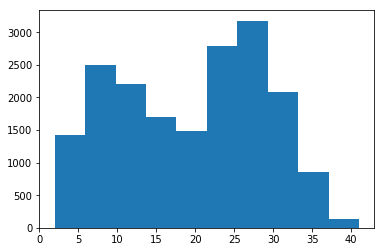

In [8]:
hist(lt);

In [9]:
ts = zeros((len(d), 50, 8))

In [33]:
for i in range(len(d)):
    for j in range(8):
        toto = d[i][0][j]
        ts[i,:len(toto),j] = toto

In [34]:
ts.shape

(18347, 50, 8)

In [12]:
output['LIGHT_CURVE'] = ts

In [38]:
yo = output[0]['LIGHT_CURVE']

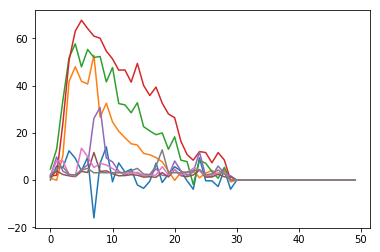

In [40]:
plot(yo)

In [41]:
output.write('table_test.fits')

In [45]:
yi = output[2]['LIGHT_CURVE']

In [46]:
yi

array([[ 2.970e+00,  1.016e+00,  1.955e+00,  3.431e+00,  2.637e+00,
         1.487e+00,  2.292e+00,  2.385e+00],
       [ 6.196e-01,  1.040e+01,  7.742e+00,  2.039e+01,  4.792e+00,
         2.335e+00,  4.168e+00,  2.739e+00],
       [ 1.134e+01,  3.384e+01,  4.211e+01,  4.884e+01,  3.707e+00,
         3.285e+00,  3.312e+00,  3.955e+00],
       [ 1.425e+01,  4.848e+01,  5.940e+01,  6.572e+01,  1.311e+00,
         1.344e+00,  1.886e+00,  2.295e+00],
       [ 9.433e+00,  5.135e+01,  5.986e+01,  8.195e+01,  3.931e+00,
         5.683e+00,  4.636e+00,  1.448e+01],
       [ 2.168e+01,  4.408e+01,  6.257e+01,  6.492e+01,  5.930e+00,
         2.766e+00,  3.535e+00,  5.204e+00],
       [ 8.176e+00,  3.591e+01,  5.497e+01,  5.671e+01,  7.698e+00,
         2.495e+00,  5.221e+00,  4.272e+00],
       [ 2.498e+01,  4.282e+01,  5.346e+01,  5.005e+01,  2.392e+01,
         3.941e+00,  5.523e+00,  4.942e+00],
       [-5.160e+00,  3.699e+01,  5.809e+01,  6.118e+01,  6.574e+00,
         3.006e+00,  5.294e+

In [13]:
output

FILENAME,SURVEY,SNID,SNTYPE,FILTERS,RA,DECL,FAKE,MWEBV,REDSHIFT_SPE,NOBS,NVAR,"LIGHT_CURVE [50,8]"
str16,str7,str12,str5,str6,str21,str20,str35,str23,str25,str5,str3,float64
DES_SN000018.DAT,DES,18,-9,griz,34.500000 deg,-5.500000 deg,3 (=> BLIND-TEST simulation),0.0227 MW E(B-V),-9.0000 +- 9.0000,118,5,0.0 .. 0.0
DES_SN000050.DAT,DES,50,-9,griz,36.750000 deg,-4.500000 deg,3 (=> BLIND-TEST simulation),0.0283 MW E(B-V),-9.0000 +- 9.0000,16,5,0.0 .. 0.0
DES_SN000051.DAT,DES,51,1,griz,52.500000 deg,-27.500000 deg,3 (=> BLIND-TEST simulation),0.0097 MW E(B-V),0.5177 +- 0.0050,121,5,0.0 .. 0.0
DES_SN000063.DAT,DES,63,-9,griz,34.500000 deg,-5.500000 deg,3 (=> BLIND-TEST simulation),0.0227 MW E(B-V),-9.0000 +- 9.0000,115,5,0.0 .. 0.0
DES_SN000064.DAT,DES,64,-9,griz,48.000000 deg,0.000000 deg,3 (=> BLIND-TEST simulation),0.0713 MW E(B-V),-9.0000 +- 9.0000,92,5,0.0 .. 0.0
DES_SN000096.DAT,DES,96,-9,griz,34.500000 deg,-5.500000 deg,3 (=> BLIND-TEST simulation),0.0227 MW E(B-V),-9.0000 +- 9.0000,104,5,0.0 .. 0.0
DES_SN000122.DAT,DES,122,-9,griz,34.500000 deg,-5.500000 deg,3 (=> BLIND-TEST simulation),0.0227 MW E(B-V),-9.0000 +- 9.0000,11,5,0.0 .. 0.0
DES_SN000124.DAT,DES,124,-9,griz,48.000000 deg,0.000000 deg,3 (=> BLIND-TEST simulation),0.0713 MW E(B-V),-9.0000 +- 9.0000,95,5,0.0 .. 0.0
DES_SN000156.DAT,DES,156,-9,griz,36.750000 deg,-4.500000 deg,3 (=> BLIND-TEST simulation),0.0283 MW E(B-V),-9.0000 +- 9.0000,87,5,0.0 .. 0.0


In [3]:
a = np.array([0,1,3,4,1,2,2,5,8,6,5])

In [4]:
UIMJD, indices = np.unique(a, return_index=True)

In [5]:
UIMJD

array([0, 1, 2, 3, 4, 5, 6, 8])

In [6]:
indices

array([0, 1, 5, 2, 3, 7, 9, 8])

In [7]:
len(indices)

8

In [11]:
for i in range(2):
    print(i)

0
1
